<a href="https://colab.research.google.com/github/Anurag-Mishra22/Fashion-MNIST/blob/main/Fashion_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fashion Classification


 Import Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         53,  70,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  83, 223, 220,
        231, 233, 231, 218, 191,  33,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 142, 248, 228, 215,
        217, 219, 219, 220, 235, 234, 107,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   3,   0,  69, 245, 221, 229, 213,
        219, 206, 210, 217, 222, 218, 243,  64,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 231, 224, 230, 222,
        217, 222, 224, 215, 215, 222, 219,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 193, 238, 216, 222, 218, 213,
        211, 208, 210, 217, 224, 217, 222, 169,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
y_train[0]

9

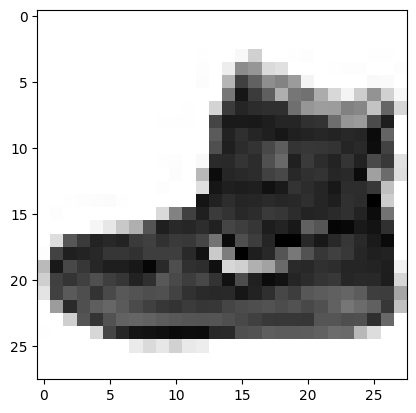

In [11]:
plt.imshow(X_train[0],cmap="Greys")

Feature Scaling

In [13]:
X_train = X_train/255
X_test = X_test/255


Build Neural Network

In [15]:
model =keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
])


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Now we compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
# Now we train our neural network
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5918 - accuracy: 0.7885
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5705 - accuracy: 0.7960
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5528 - accuracy: 0.8033
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5373 - accuracy: 0.8092
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5239 - accuracy: 0.8151
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5121 - accuracy: 0.8192
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5017 - accuracy: 0.8225
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4928 - accuracy: 0.8274
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4851 - accuracy: 0.8301
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.478

Test and Evaluate Neural Network Model

In [22]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5042 - accuracy: 0.8190


[0.504226803779602, 0.8190000057220459]

In [23]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [25]:
y_pred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.38, 0.  , 0.47],
      dtype=float32)

In [26]:
np.argmax(y_pred[0].round(2))

9

In [27]:
y_test[0]

9

Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,[np.argmax(i) for i in y_pred])     #(actual_value,predicted_value)


<Axes: >

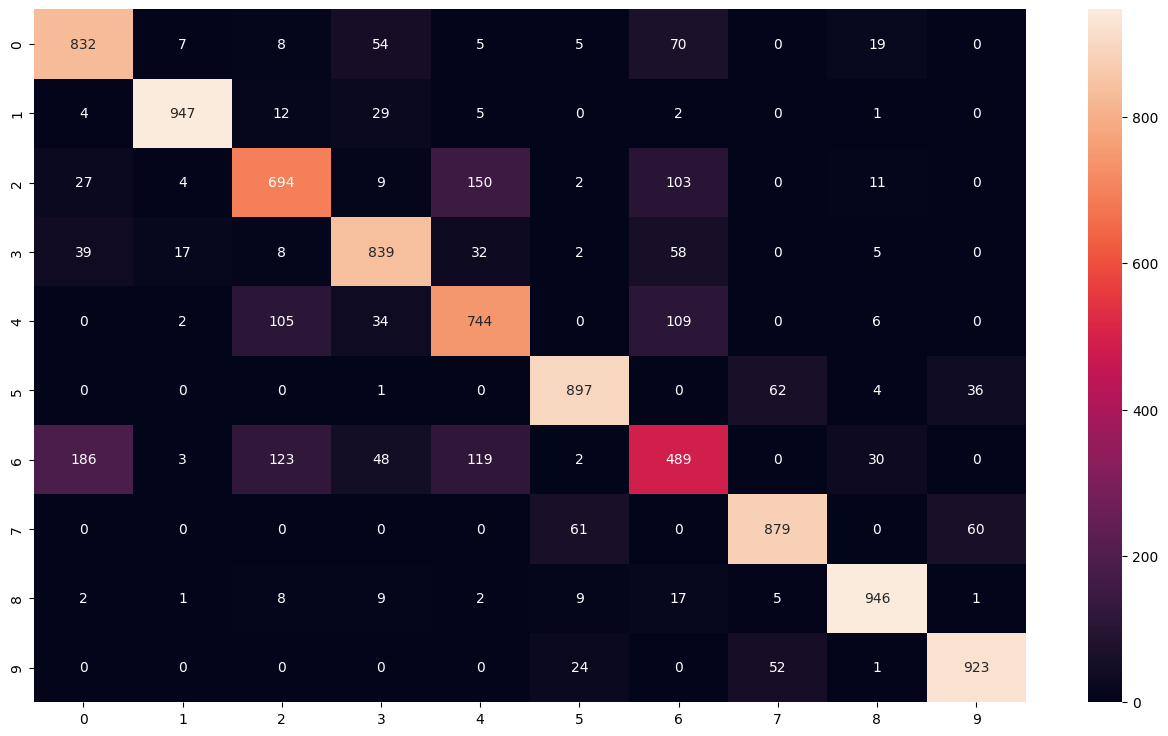

In [30]:
plt.figure(figsize=(16,9))
sns.heatmap(cm,annot=True,fmt="d")

Classification Report

In [34]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,[np.argmax(i) for i in y_pred],)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.83      0.80      1000
           1       0.97      0.95      0.96      1000
           2       0.72      0.69      0.71      1000
           3       0.82      0.84      0.83      1000
           4       0.70      0.74      0.72      1000
           5       0.90      0.90      0.90      1000
           6       0.58      0.49      0.53      1000
           7       0.88      0.88      0.88      1000
           8       0.92      0.95      0.94      1000
           9       0.90      0.92      0.91      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



Save Model

In [35]:
model.save("MNIST_classifier_nn_model.h5")

In [36]:
model =keras.models.load_model("MNIST_classifier_nn_model.h5")

In [37]:
model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[2.64132780e-07, 3.95728463e-08, 3.58239868e-06, ...,
        3.82927358e-01, 3.27613973e-03, 4.72624928e-01],
       [3.20743507e-04, 8.47361116e-06, 9.15666878e-01, ...,
        1.18488017e-14, 1.37438867e-04, 4.90521124e-10],
       [1.03139355e-05, 9.99877989e-01, 2.22791841e-05, ...,
        2.18783525e-09, 9.72612324e-10, 4.97929233e-11],
       ...,
       [2.30950247e-02, 2.92153709e-06, 1.14097085e-03, ...,
        3.26942281e-05, 8.78310442e-01, 2.40660484e-05],
       [7.17040093e-05, 9.91931319e-01, 2.14741958e-04, ...,
        3.59041132e-06, 1.48741506e-07, 3.86054893e-07],
       [1.06061489e-04, 1.28628351e-04, 9.17158497e-04, ...,
        2.83408672e-01, 1.70664284e-02, 1.71474963e-02]], dtype=float32)